# MNIST Handwritten Digits

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import numpy
import matplotlib.pyplot as plt
import png

In [3]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [4]:
import tensorflow
tensorflow.config.list_physical_devices('GPU')

2025-05-06 20:25:18.936450: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 20:25:18.948090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746559518.958990   18792 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746559518.962104   18792 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746559518.971914   18792 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
len(train_labels), len(test_labels)

(60000, 10000)

In [9]:
images = numpy.concatenate((train_images, test_images))

In [10]:
labels = numpy.concatenate((train_labels, test_labels))

In [11]:
len(images), len(labels)

(70000, 70000)

In [12]:
permutation_index = numpy.random.permutation(len(labels))

permute_images = images[permutation_index]
permute_labels = labels[permutation_index]

new_train_images = permute_images[0:50000]
new_train_labels = permute_labels[0:50000]

new_test_images = permute_images[50000:60000]
new_test_labels = permute_labels[50000:60000]

new_validation_images = permute_images[60000:]
new_validation_labels = permute_labels[60000:]

invert the colors

In [13]:
new_train_images = 255 - new_train_images
new_test_images = 255 - new_test_images
new_validation_images = 255 - new_validation_images

In [14]:
# 53912 is weird looking

select first digits 0-9 for rendering numerical values

In [15]:
digit_index = numpy.array([], dtype=numpy.int64)
for digit in range(10):
    digit_index = numpy.append(digit_index, numpy.where(new_train_labels == digit)[0][0])

digit_index

array([31,  8,  7,  3,  9,  2,  0, 16, 14,  1])

In [16]:
# Create digit images

all_digit_images = []

for digit_index_ in numpy.nditer(digit_index):
    digit_image = new_train_images[digit_index_]
    digit_image_reshape = numpy.reshape(digit_image, shape=(28,28))
    all_digit_images.append(digit_image_reshape)

len(all_digit_images)

10

print the first 100 digits, with their index, and their label

In [ ]:
size_y = 100
size_x = 10

tmp = numpy.full((size_y*28, size_x*28), 255, dtype=numpy.uint8)

for i in range(size_y):
    i_string = f'{i}'

    oix_x = 28 * 0
    oix_y = 28 * i

    # print the index number
    for i_string_char in i_string:
        i_string_char_int = int(i_string_char) - int('0')
        #print(f'character is: {i_string_char}, {i_string_char_int}')
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[i_string_char_int]]
        oix_x += 28

    oix_x = 28 * 5 # assumes max 5 chars for index
    oix_x += 28 # leave a space

    # print the label
    i_label = new_train_labels[i]
    tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[i_label]]

    oix_x += 28 * 2

    # print the actual image observed
    tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[i]

    oix_x = 28 * 0
    oix_y += 28
    #break

writer = png.Writer(width=tmp.shape[1], height=tmp.shape[0], bitdepth=8, greyscale=True)
with open('tmp.png', 'wb') as ofile:
    writer.write(ofile, tmp)

train neural net

In [26]:
# this is my model
layer_size = 16 #28
print(f'layer size: {layer_size}')

model = keras.Sequential([
    layers.Dense(layer_size, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

layer size: 16


In [158]:
# this is the original model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
new_train_images_float = new_train_images.astype('float32') / 255.0
new_test_images_float = new_test_images.astype('float32') / 255.0
new_validation_images_float = new_validation_images.astype('float32') / 255.0

In [19]:
new_train_images_float = new_train_images_float.reshape((new_train_images_float.shape[0], new_train_images_float.shape[1]*new_train_images_float.shape[2]))
new_test_images_float = new_test_images_float.reshape((new_test_images_float.shape[0], new_test_images_float.shape[1]*new_test_images_float.shape[2]))
new_validation_images_float = new_validation_images_float.reshape((new_validation_images_float.shape[0], new_validation_images_float.shape[1]*new_validation_images_float.shape[2]))

In [20]:
new_train_images_float.shape

(50000, 784)

In [21]:
new_train_labels.shape

(50000,)

In [27]:
with tensorflow.device('/GPU:0'):
    model_history = model.fit(new_train_images_float, new_train_labels, epochs=200, batch_size=512)

Epoch 1/200


2025-05-06 20:31:34.239958: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_185', 4 bytes spill stores, 4 bytes spill loads

2025-05-06 20:31:34.280901: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_185', 260 bytes spill stores, 260 bytes spill loads

2025-05-06 20:31:34.303105: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_185', 476 bytes spill stores, 476 bytes spill loads

2025-05-06 20:31:34.473971: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_185', 436 bytes spill stores, 436 bytes spill loads



76/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1813 - loss: 2.2729

2025-05-06 20:31:36.130844: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_185', 168 bytes spill stores, 168 bytes spill loads

2025-05-06 20:31:36.461910: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_185', 168 bytes spill stores, 168 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1941 - loss: 2.2330
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3987 - loss: 1.6940
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6072 - loss: 1.2610
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.9544
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.7692
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.6600
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8301 - loss: 0.5909
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.5501
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.5101
Epoch 10/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.4994
Epoch 11/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8584 - loss: 0.4756
Epoch 12/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - l

In [28]:
accuracy = model_history.history['accuracy'][0:]

In [29]:
loss = model_history.history['loss'][0:]

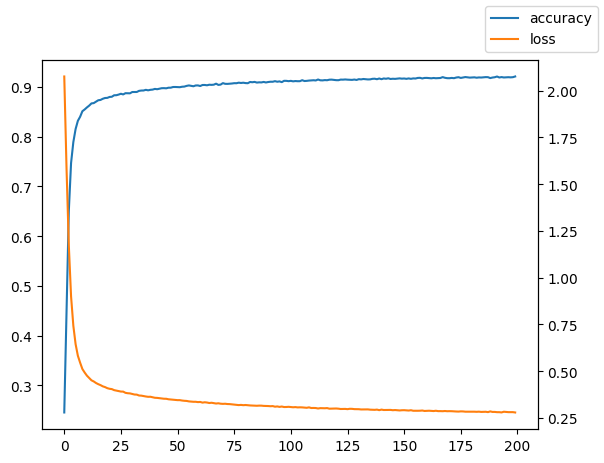

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot(accuracy, label='accuracy')
ax2 = ax.twinx()
ax2.plot(loss, color='tab:orange', label='loss')
fig.legend()

In [51]:
# check the training dataset, not the test dataset
test_digits = new_train_images_float #[0:3] # test all!
predictions = model.predict(test_digits)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [52]:
predictions.shape

(50000, 10)

In [53]:
for prediction in predictions[0:3]:
    for v in prediction:
        print(v, end=', ')
    print('')

2.531413e-07, 0.2191548, 0.06179936, 0.012976415, 4.6181826e-06, 0.002786501, 0.0020940832, 1.9087465e-06, 0.7010653, 0.00011676918, 
0.03378577, 1.278885e-05, 1.4477175e-05, 0.10765621, 0.0077005075, 0.38873136, 1.4410923e-06, 0.37072563, 0.0007495255, 0.090622306, 
0.9879661, 3.0866357e-08, 0.0003479702, 8.472503e-05, 1.2530493e-06, 0.011128561, 0.00019157372, 1.4202485e-06, 0.00027130655, 6.93925e-06, 


In [54]:
# this array contains the predicted digit value
predictions_argmax = predictions.argmax(axis=1)

In [55]:
predictions_argmax.shape

(50000,)

In [56]:
# for example: [2, 4, 2, 9, 9, 3, ...] means the digits should be
# 2, 4, 2, 9, 9, 3, ...
predictions_argmax[0:3]

array([8, 5, 0])

In [57]:
for i, arg in enumerate(predictions_argmax[0:3]):
    print(predictions[i, arg])

0.7010653
0.38873136
0.9879661


In [58]:
predictions_max_probability = predictions[numpy.arange(len(predictions)), predictions.argmax(axis=1)]

In [59]:
predictions_max_probability

array([0.7010653 , 0.38873136, 0.9879661 , ..., 0.9921176 , 0.89423174,
       0.99525046], dtype=float32)

In [60]:
predictions_max_probability_sort_order_index = numpy.argsort(predictions_max_probability)

In [61]:
predictions_max_probability_sort_order_index

array([49965, 46965,  1840, ..., 20312,  6582, 49786])

In [62]:
predictions_max_probability_sorted = predictions_max_probability[predictions_max_probability_sort_order_index]

In [63]:
predictions_max_probability_sorted

array([0.20805344, 0.21680976, 0.2244246 , ..., 0.9999776 , 0.9999794 ,
       0.9999845 ], dtype=float32)

In [64]:
predictions_argmax_sorted = predictions_argmax[predictions_max_probability_sort_order_index]

In [65]:
predictions_argmax_sorted

array([4, 4, 5, ..., 2, 2, 2])

In [66]:
#images_sorted = (new_train_images[0:3])[predictions_max_probability_sort_order_index]
images_sorted = new_train_images[predictions_max_probability_sort_order_index]

In [67]:
images_sorted.shape

(50000, 28, 28)

In [68]:
images_sorted_index = numpy.arange(images_sorted.shape[0])[predictions_max_probability_sort_order_index]
images_sorted_index

array([49965, 46965,  1840, ..., 20312,  6582, 49786])

In [74]:
labels_sorted = new_train_labels[predictions_max_probability_sort_order_index]

In [ ]:
def print_output(filename, predictions_argmax_sorted, predictions_max_probability_sorted, images_sorted, images_sorted_index, labels_sorted):
    size_y = 100
    size_x = 30

    tmp = numpy.full((size_y*28, size_x*28), 255, dtype=numpy.uint8)

    for i in range(len(predictions_argmax_sorted)):
        prediction = predictions_argmax_sorted[i]
        image = images_sorted[i]
        image_index = images_sorted_index[i]

        oix_x = 28 * 0
        oix_y = 28 * i

        image_index_string = f'{image_index}'
        image_index_string_length = len(image_index_string)
        oix_x = 28 * (5 - image_index_string_length)
        for ch in image_index_string:
            ch_int = int(ch) - int('0')
            tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[ch_int]]
            oix_x += 28

        oix_x = 28 * 5 # assumes max 5 chars for index
        oix_x += 28 # leave a space

        # print the actual label
        label = labels_sorted[i]
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[label]]

        oix_x += 28 * 2

        # print the label (predicted label)
        i_label = predictions_argmax_sorted[i]
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[i_label]]

        oix_x += 28 * 2

        # print the actual image observed
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = images_sorted[i]

        oix_x += 28 * 2

        # print the probability value
        max_probability = predictions_max_probability_sorted[i]
        max_probability_string = f'{max_probability:0.5f}'
        for ch in max_probability_string:
            if ch == '.':
                # try to print a dot
                tmp[oix_y+20:oix_y+20+4, oix_x+10:oix_x+10+4] = 0
            else:
                ch_int = int(ch) - int('0')
                tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[ch_int]]

            oix_x += 28

        oix_x += 28 * 1

        # print "wrong" if label does not match
        #label = labels_sorted[i]
        if label != i_label:
            for x in range(28):
                y1 = x
                y2 = 28 - (x + 1)
                x1 = x
                x2 = x
                tmp[oix_y+y1,oix_x+x1] = 0
                tmp[oix_y+y2,oix_x+x2] = 0

        oix_x = 28 * 0
        oix_y += 28



    writer = png.Writer(width=tmp.shape[1], height=tmp.shape[0], bitdepth=8, greyscale=True)
    with open(filename, 'wb') as ofile:
        writer.write(ofile, tmp)

In [ ]:
# Plot worst performing results

max_count = 100

print_output(
    'worst-performers.png',
    predictions_argmax_sorted[0:max_count],
    predictions_max_probability_sorted[0:max_count],
    images_sorted[0:max_count],
    images_sorted_index[0:max_count],
    labels_sorted[0:max_count],
)

In [ ]:
# Plot best performing results

max_count = 100
l = len(predictions_max_probability_sorted)

print_output(
    'best-performers.png',
    predictions_argmax_sorted[-max_count:],
    predictions_max_probability_sorted[-max_count:],
    images_sorted[-max_count:],
    images_sorted_index[-max_count:],
    labels_sorted[-max_count:],
)